In [26]:
import warnings
warnings.filterwarnings(action="ignore")

# SVM(Support Vector Machine)

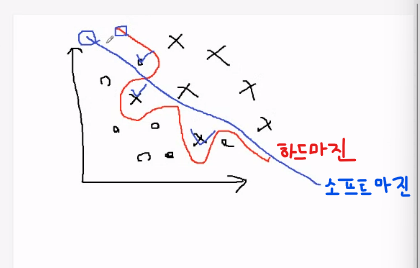

## Scikit-Learn의 서포트 벡터 머신 -1

### 1. SVM 연습 예제

<h3 style="color:#ff6600;">- make_blobs(): 분류용 가상 데이터 생성 함수</h3>

등방성 가우시안 정규분포를 이용해 가상 데이터를 생성한다.

- 인수
    - <b style="background:yellow;">n_samples</b>: 표본 데이터의 수 (default=100)
    - <b style="background:yellow;">n_features</b>: 독립 변수의 수 (default=2)
    - <b style="background:yellow;">centers</b>: 정수 또는 [n_centers, n_features] 크기의 배열. 생성한 클러스터의 수 혹은 중심 (default=3)
    - <b>cluster_std</b>: 클러스터의 표준편차. (default=1.0)
    - <b>center_box</b>: 생성할 클러스터의 바운딩 박스(bounding box). (default=(-10.0, 10.0))


- 반환값:
    - <b style="background:yellow;">X: 독립 변수.</b> [n_samples, n_features] 크기의 배열
    - <b style="background:yellow;">y: 종속 변수.</b> [n_samples] 크기의 배열

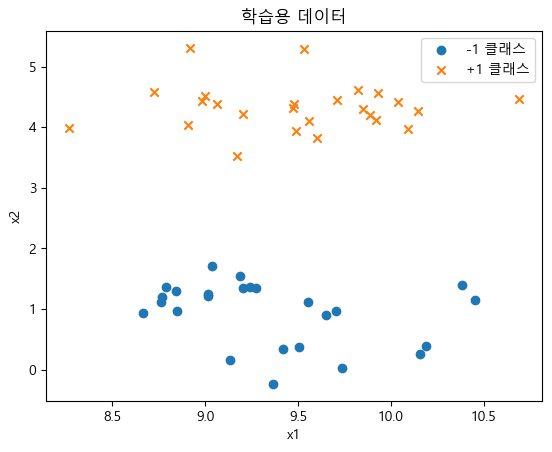

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=50, centers=2, cluster_std=0.5, random_state=4)
y = 2 * y - 1

plt.rcParams["font.family"] = "Malgun Gothic"
plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 클래스")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 클래스")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("학습용 데이터")
plt.show()

In [7]:
print("X:\n", X)
print("y:\n", y)

X:
 [[ 9.24222414  1.36290933]
 [ 9.17124955  3.52485535]
 [ 8.84264231  1.29144424]
 [ 9.13144602  0.15235637]
 [ 8.66686663  0.93996493]
 [ 8.76869749  1.19960487]
 [10.45227689  1.14179259]
 [ 9.4874227   3.93018752]
 [ 9.55834394  4.10909742]
 [10.03578098  4.41764995]
 [ 9.70226758  0.96771277]
 [ 9.53292197  5.29136138]
 [ 8.90512626  4.03222184]
 [ 8.91604215  5.30752241]
 [ 9.42054325  0.3401709 ]
 [ 9.55313298  1.11077156]
 [ 9.01498386  1.21587064]
 [ 8.84910095  0.97186135]
 [ 9.73389792  0.02420705]
 [ 9.1891148   1.54564628]
 [ 9.27524446  1.34568829]
 [ 9.85130417  4.30586485]
 [ 9.0167434   1.24393257]
 [ 9.70857663  4.44654264]
 [10.69197928  4.47249157]
 [ 9.4779887   4.39064298]
 [ 9.2024951   1.34290093]
 [10.14364725  4.26904052]
 [ 9.00096813  4.51145554]
 [ 9.6022578   3.81543147]
 [ 8.78780476  1.36356316]
 [ 9.9310365   4.5579437 ]
 [10.38453221  1.40206546]
 [ 8.76218865  1.12014356]
 [ 9.88910809  4.20871461]
 [10.08959651  3.97249761]
 [ 8.9815029   4.4367522

<h3 style="color:#ff6600;">- SVC 파라미터</h3>

- <b style="background:yellow;">C</b>
    - 잘못 분류된 데이터로부터 해당 클래스의 결정 경계까지의 거리로 데이터 점이 잘못 분류된 정도를 나타낸다.
    - SVM 모델이 오류를 어느정도 허용할 것인지 파라미터 C를 통해 지정
    - 값이 클수록 하드마진(오류 허용 안 함), 작을수록 소프트마진(오류 허용)이다.


- <b style="background:yellow;">gamma</b>
    - 결정 경계를 얼마나 유연하게 그을 것인지 정해주는 역할
    - gamma값을 높이면 학습 데이터에 많이 의존해서 결정 경계를 구불구불 긋게 된다. => <span style="border-bottom: 1px solid #999;">오버피팅 초래</span>
    - gamma 값을 낮추면 학습 데이터에 별로 의존하지 않고 결정 경계를 직선에 가깝게 긋게 된다. => <span style="border-bottom: 1px solid #999;">언더피팅 초래</span>
    

- <b style="background:yellow;">kernel</b>
    - 판별 경계를 찾기 위한 내적 함수. 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'. (default='rbf')


※ C와 Gamma를 지나치게 높게 잡으면 오버피팅이 될 수 있다.

In [8]:
from sklearn.svm import SVC

model = SVC(kernel='linear', C=1e10).fit(X, y)
model

# 슬랙변수(c): 잘못 분류된 데이터로부터 해당 클래스의 결정 경계까지의 거리로 데이터 점이 잘못 분류된 정도를 나타낸다.
# 커널(kernel): 판별 경계를 찾기 위한 내적 함수

# kernel, C뿐만아니라 gamma값도 넣고싶다면, GridSearchCV를 사용해 최적의 값을 찾아 넣어주면 된다.

SVC(C=10000000000.0, kernel='linear')

#### SVC를 사용하여 모형을 구하면 다음과 같은 속성값을 가짐

- <b>n_support_</b>: 각 서클래스의 서포트 벡터 개수
- <b>support_</b>: 각 클래스의 서포트 벡터의 인덱스
- <b>support_vectors_</b>: 각 클래스의 서포트 x 값
- <b>coef_</b>: 기울기
- <b>intercept_</b>: 절편
- <b>dual_coef_</b>: 각 원소가 ai*yi로 이루어진 벡터. 음의 계수와 양의 계수를 나타냄

In [9]:
model.n_support_

array([1, 1])

In [11]:
model.support_

# -1에, 1의 위치를 나타냄

array([42,  1])

In [13]:
model.support_vectors_

# -1과 1로 분류된 서포트벡터의 42위치와 1위치의 데이터값

array([[9.03715314, 1.71813465],
       [9.17124955, 3.52485535]])

In [14]:
y[model.support_]

# target데이터의 정답 위치

array([-1,  1])

In [15]:
model.coef_

array([[0.08171082, 1.10091404]])

In [16]:
model.intercept_

array([-3.62995208])

In [18]:
model.dual_coef_

array([[-0.60934379,  0.60934379]])

### 2. SVM 예측 결과

#### 경계선 그리기

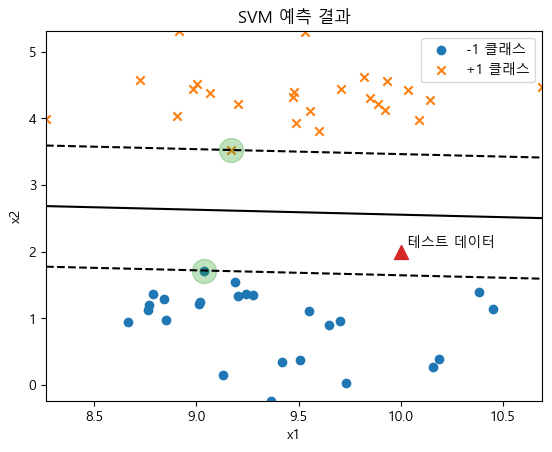

In [19]:
import numpy as np

xmin = X[:, 0].min()
xmax = X[:, 0].max()
ymin = X[:, 1].min()
ymax = X[:, 1].max()

xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)

# linspace(a, b, 개수): a와 b사이 개수를 일정한 간격으로 만들어내라는 함수

X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)

for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]])
    Z[i, j] = p[0]
    
levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']

plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 클래스")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 클래스")

plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)   # 선을 그려줌
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, alpha=0.3)   # 서포트 벡터 그려줌

x_new = [10, 2]

plt.scatter(x_new[0], x_new[1], marker='^', s=100)
plt.text(x_new[0] + 0.03, x_new[1] + 0.08, "테스트 데이터")

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("SVM 예측 결과")
plt.show()

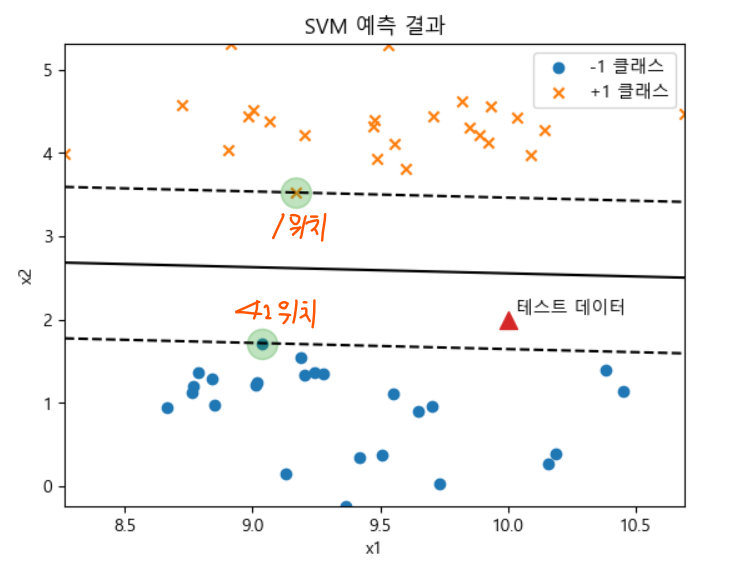

#### - decision_function(): 판별 함수

- 판별 함수: 모든 표본 데이터에 대해 판별 함수 값을 계산
- 판별 함수 값: 
    - 판별 평면으로부터의 거리.
    - 판별 함수 값이 음수이면 0인 클래스, 양수이면 1인 클래스로 판별
    - 즉 0이 클래스 판별 기준값이 된다.

---
#### ndenumerate() 예제

In [20]:
a = np.array([[1, 2], [3, 4], [5, 6]])

for (x, y), value in np.ndenumerate(a):
    print((x, y), value)

(0, 0) 1
(0, 1) 2
(1, 0) 3
(1, 1) 4
(2, 0) 5
(2, 1) 6


=> 예제 결과 형태

<table>
    <tr>
        <td><b>1</b><br>(0, 0)</td>
        <td><b>2</b><br>(0, 1)</td>
    </tr>
    <tr>
        <td><b>3</b><br>(1, 0)</td>
        <td><b>4</b><br>(1, 1)</td>
    </tr>
    <tr>
        <td><b>5</b><br>(2, 0)</td>
        <td><b>6</b><br>(2, 1)</td>
    </tr>
</table>

---

In [5]:
x_new = [10, 2]
model.decision_function([x_new])

array([-0.61101582])

In [6]:
model.coef_.dot(x_new) + model.intercept_

array([-0.61101582])

## Sickit-Learn의 서포트벡터 머신-2 (iris 문제)

### 1. 커널 인수 kernel과 슬랙변수 가중치 인수 C는 각각 linear, 1e10으로 설정

In [30]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

iris = load_iris()
X_data = iris.data[(iris.target == 0) | (iris.target == 1), :2]
y = iris.target[(iris.target == 0) | (iris.target == 1)]

X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.3, random_state=0)

svm = SVC(kernel="linear", C=1e10)
svm.fit(X_train, y_train)

pred_y = svm.predict(X_test)
confusion_matrix(pred_y, y_test)

array([[15,  0],
       [ 0, 15]], dtype=int64)

In [31]:
X_data.shape

(100, 2)

=> confusion_matrix(pred_y, y_test)

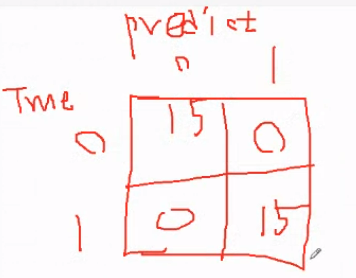

### 2. 슬랙변수의 C값에 따른 오차 허용의 차이 테스트

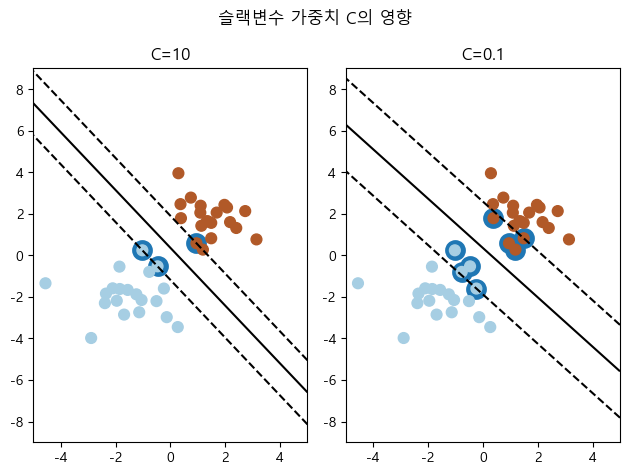

In [34]:
import matplotlib as mol
mol.rcParams['axes.unicode_minus'] = False

np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [-1] * 20 + [1] * 20

plotnum = 1
for name, penalty in (('C=10', 10), ('C=0.1', 0.1)):
    clf = SVC(kernel="linear", C=penalty).fit(X, Y)
    xx = np.linspace(-5, 5)
    x_jin = -5
    x_jax = 5
    y_jin = -9
    y_jax = 9
    
    XX, YY = np.mgrid[x_jin:x_jax:200j, y_jin:y_jax:200j]
    
    levels = [-1, 0, 1]
    linestyles = ['dashed', 'solid', 'dashed']
    
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    
    plt.subplot(1, 2, plotnum)
    plt.contour(XX, YY, Z, levels, colors="k", linestyles=linestyles)
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=120, linewidth=4)
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=60, linewidth=1, cmap=plt.cm.Paired)
    plt.xlim(x_jin, x_jax)
    plt.ylim(y_jin, y_jax)
    plt.title(name)
    
    plotnum += 1
    
plt.suptitle("슬랙변수 가중치 C의 영향")
plt.tight_layout()
plt.show()

## Scikit-Learn의 서포트 벡터 머신-3 (얼굴 인식)

### 1. 얼굴이미지 인식

총 40명이 각각 10장의 조금씩 다른 표정이나 모습으로 찍은 이미지 데이터

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\aischool\scikit_learn_data


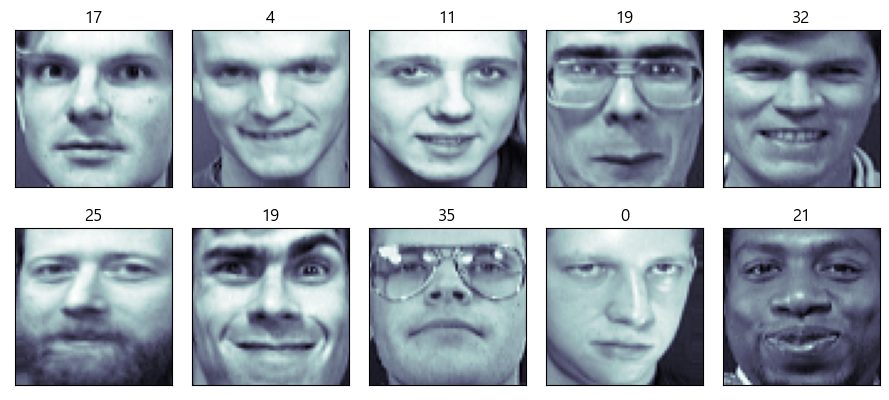

In [35]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()
N = 2
M = 5

np.random.seed(0)
fig = plt.figure(figsize=(9,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(faces.data)), N*M)

for i in range(N):
    for j in range(M):
        k = klist[i * M + j]
        ax = fig.add_subplot(N, M, i * M + j + 1)
        ax.imshow(faces.images[k], cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(faces.target[k])b
        
plt.tight_layout()
plt.show()

In [44]:
faces.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [46]:
faces.data.shape

# 이미지데이터의 shape은 2차원구조를 1차원구조로 변경되어있음
# (x, y, 색상) 색상값에 3이들어가있으면 rgb로 컬러이미지, 없거나 1이들어있으면 흑백이미지

(400, 4096)

In [47]:
faces.images.shape

# 화면에 출력할 실제 이미지 정보
# 이런 형식으로 구성되어있다면, 학습을 위해 2차원 구조를 1차원 구조로 변경해야함 => reshape!!!
# ∴ 2차원 구조는 이미지를 보여주고 싶을때, 1차원 구조는 데이터를 가공할때 사용한다.

(400, 64, 64)

In [48]:
faces.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [49]:
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [50]:
faces.data[0]

# 이미지 색상값은 0~255까지(256색상) 구성되어야하는데 출력결과를 보니 minmax스케일링 작업을 한 것으로 보인다.

array([0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
       0.1570248 ], dtype=float32)

### 2. 랜덤하게 뽑은 이미지

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.4, random_state=0)
X_train.shape, X_test.shape

((240, 4096), (160, 4096))

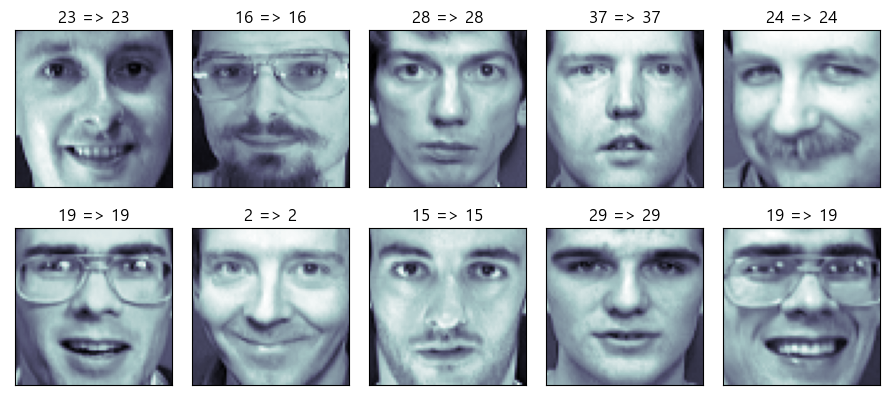

In [53]:
from sklearn.svm import SVC

svc = SVC(kernel="linear").fit(X_train, y_train)   # svc => 학습이 끝난 모델
N = 2
M = 5

np.random.seed(4)
fig = plt.figure(figsize=(9,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)   # subplot의 각각 영역에 대한 간격 조절
klist = np.random.choice(range(len(y_test)), N*M)

for i in range(N):
    for j in range(M):
        k = klist[i * M + j]
        ax = fig.add_subplot(N, M, i * M + j + 1)
        ax.imshow(X_test[k:(k + 1), :].reshape(64, 64), cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("%d => %d" % (y_test[k], svc.predict(X_test[k:(k+1), :])[0]))   # 실제값 => 예측값 출력
        
plt.tight_layout()
plt.show()
        

### 3. 랜덤하게 뽑은 이미지 예측

In [39]:
from sklearn.metrics import classification_report, accuracy_score

y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)

print("1:\n", classification_report(y_train, y_pred_train))
print("2:\n", classification_report(y_test, y_pred_test))

1:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.00         8
          17       1.00

## Scikit-Learn의 서포트 벡터 머신-4 (비만도 테스트)

- 몸무게 최대 100kg, 키 최대 200cm로 가정하고 전처리
- 정답률: metrics.accuracy_score() 사용
- 리포트: metrics.classification_report() 사용

In [98]:
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

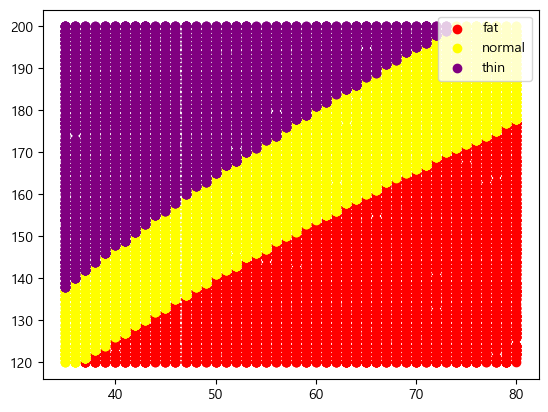

In [97]:
tbl = pd.read_csv("./datasets/bmi.csv", index_col=2)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

def scatter(lbl, color):
    b = tbl.loc[lbl]
    ax.scatter(b['weight'], b['height'], c= color, label=lbl)
    
scatter("fat", "red")
scatter("normal", "yellow")
scatter("thin", "purple")
ax.legend()

plt.savefig("bmi-test.png")
plt.show()

In [149]:
tbl1 = pd.read_csv("./datasets/bmi.csv")
tbl1

,height,weight,label
0,142,62,fat
1,142,73,fat
2,177,61,normal
3,187,48,thin
4,153,60,fat
...,...,...,...
19995,122,58,fat
19996,193,69,normal
19997,193,37,thin
19998,195,51,thin


In [113]:
tbl1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   height  20000 non-null  int64 
 1   weight  20000 non-null  int64 
 2   label   20000 non-null  object
dtypes: int64(2), object(1)
memory usage: 468.9+ KB


In [114]:
tbl1.describe()

,height,weight
count,20000.000000,20000.000000
mean,159.927200,57.535000
std,23.342096,13.285259
min,120.000000,35.000000
25%,140.000000,46.000000
50%,160.000000,58.000000
75%,180.000000,69.000000
max,200.000000,80.000000


In [115]:
tbl1[tbl1['weight'] > 100]

,height,weight,label


In [116]:
tbl1[tbl1['weight'] > 100] | tbl1[tbl1['height'] > 200]

,height,weight,label


from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
label_encoder = ohe.fit_transform(tbl1[['label']])
print(label_encoder)

tbl1['label'] = label_encoder.toarray()
tbl1

tbl1

In [150]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
tbl1.iloc[:, :-1] = mm.fit_transform(tbl1.iloc[:, :-1])
tbl1

,height,weight,label
0,0.2750,0.600000,fat
1,0.2750,0.844444,fat
2,0.7125,0.577778,normal
3,0.8375,0.288889,thin
4,0.4125,0.555556,fat
...,...,...,...
19995,0.0250,0.511111,fat
19996,0.9125,0.755556,normal
19997,0.9125,0.044444,thin
19998,0.9375,0.355556,thin


In [154]:
x_data = tbl1.iloc[:, :-1]
y_data = tbl1['label']
y_data

0           fat
1           fat
2        normal
3          thin
4           fat
          ...  
19995       fat
19996    normal
19997      thin
19998      thin
19999    normal
Name: label, Length: 20000, dtype: object

In [155]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33, random_state=42)
X_train.shape, X_test.shape

((13400, 2), (6600, 2))

In [156]:
from sklearn.svm import SVC

svc = SVC(kernel="linear").fit(X_train, y_train)
svc

SVC(kernel='linear')

In [157]:
from sklearn.metrics import classification_report, accuracy_score

y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)

print("정답률 =", accuracy_score(y_test, y_pred_test))
print("리포트 =\n", classification_report(y_test, y_pred_test))

정답률 = 0.9837878787878788
리포트 =
               precision    recall  f1-score   support

         fat       0.99      0.99      0.99      2342
      normal       0.98      0.97      0.97      2100
        thin       0.98      0.99      0.99      2158

    accuracy                           0.98      6600
   macro avg       0.98      0.98      0.98      6600
weighted avg       0.98      0.98      0.98      6600



---
### Answer

In [142]:
bmi = pd.read_csv("./datasets/bmi.csv")
bmi

,height,weight,label
0,142,62,fat
1,142,73,fat
2,177,61,normal
3,187,48,thin
4,153,60,fat
...,...,...,...
19995,122,58,fat
19996,193,69,normal
19997,193,37,thin
19998,195,51,thin


In [143]:
label = bmi['label']
w = bmi['weight'] / 100   # 최대 100kg라고 가정
h = bmi['height'] / 200   # 최대 200cm라고 가정
# 스케일링 작업을 최대값을 가정하여 그에 맞춰 작업
wh = pd.concat([w, h], axis=1)
wh

,weight,height
0,0.62,0.710
1,0.73,0.710
2,0.61,0.885
3,0.48,0.935
4,0.60,0.765
...,...,...
19995,0.58,0.610
19996,0.69,0.965
19997,0.37,0.965
19998,0.51,0.975


In [144]:
wh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   weight  20000 non-null  float64
 1   height  20000 non-null  float64
dtypes: float64(2)
memory usage: 312.6 KB


In [145]:
X_train, X_test, y_train, y_test = train_test_split(wh, label, test_size=0.25, random_state=1)
X_train.shape, X_test.shape

((15000, 2), (5000, 2))

In [146]:
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [147]:
predict = clf.predict(X_test)
predict

array(['thin', 'thin', 'fat', ..., 'fat', 'fat', 'fat'], dtype=object)

In [148]:
ac_score = metrics.accuracy_score(y_test, predict)
cl_report = metrics.classification_report(y_test, predict)
print("정답률 =", ac_score)
print("리포트 =\n", cl_report)

정답률 = 0.9968
리포트 =
               precision    recall  f1-score   support

         fat       1.00      1.00      1.00      1870
      normal       0.99      1.00      0.99      1560
        thin       1.00      1.00      1.00      1570

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000

